### Installing Required Packages

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

RANDOM_STATE = 42

### Loading Dataset
Loading the fetal health dataset from a CSV file and displaying the first 10 rows to understand the structure and features available for analysis.

In [88]:

df = pd.read_csv('/Users/relentless/Downloads/fetal_health.csv')
df.head(10)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


### Checking for Missing Values

Checking for missing values in the dataset to ensure data quality before proceeding with analysis. This step is crucial for identifying any data cleaning needs.

In [91]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Processing Step & Visualizations

Executing data processing and analysis operations.

In [94]:
df.corr().T

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

Percentages:
fetal_health
1.0    77.845720
2.0    13.875823
3.0     8.278457
Name: proportion, dtype: float64


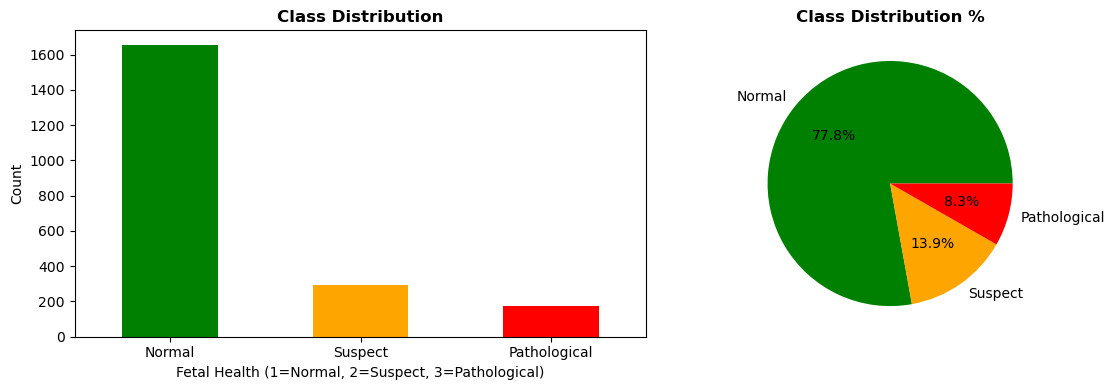

In [112]:
# Check class distribution
print("Class Distribution:")
print(df['fetal_health'].value_counts().sort_index())
print("\nPercentages:")
print(df['fetal_health'].value_counts(normalize=True).sort_index() * 100)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Class distribution
df['fetal_health'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color=['green', 'orange', 'red'])
axes[0].set_title('Class Distribution', fontweight='bold')
axes[0].set_xlabel('Fetal Health (1=Normal, 2=Suspect, 3=Pathological)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Normal', 'Suspect', 'Pathological'], rotation=0)

# Pie chart
df['fetal_health'].value_counts().sort_index().plot(kind='pie', ax=axes[1], 
                                                      labels=['Normal', 'Suspect', 'Pathological'],
                                                      autopct='%1.1f%%', colors=['green', 'orange', 'red'])
axes[1].set_title('Class Distribution %', fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### Computing Feature Correlations

Computing the correlation matrix to identify which features have the strongest relationships with fetal health outcomes. This helps us understand which variables are most predictive of the target variable.

In [97]:
print("Correlation with target (fetal_health)")
print("=" * 66)
target_corr = df.corr()['fetal_health'].abs().sort_values(ascending=False)
print(target_corr.head(15))

Correlation with target (fetal_health)
fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
histogram_mode                                            0.250412
histogram_mean                                            0.226985
mean_value_of_long_term_variability                       0.226797
histogram_variance                                        0.206630
histogram_median                                          0.205033
uterine_contractions                                      0.204894
baseline value                                            0.148151
histogram_tendency                                        0.131976
severe_decelerations                                      0.131934
mean_value_of_short_ter

### Processing Step

Executing data processing and analysis operations.

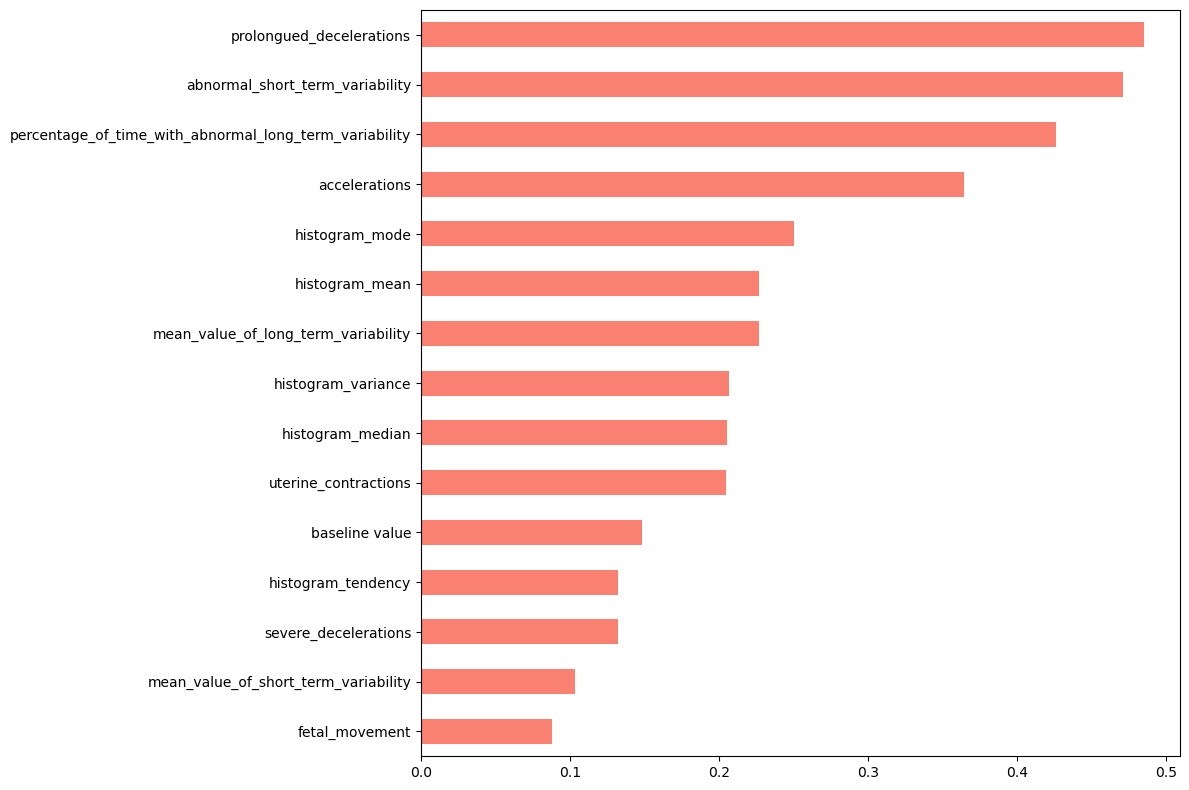

In [100]:

plt.figure(figsize = (12,8))
target_corr[1:16].sort_values().plot(kind = 'barh', color = 'salmon')
plt.tight_layout()
plt.show()

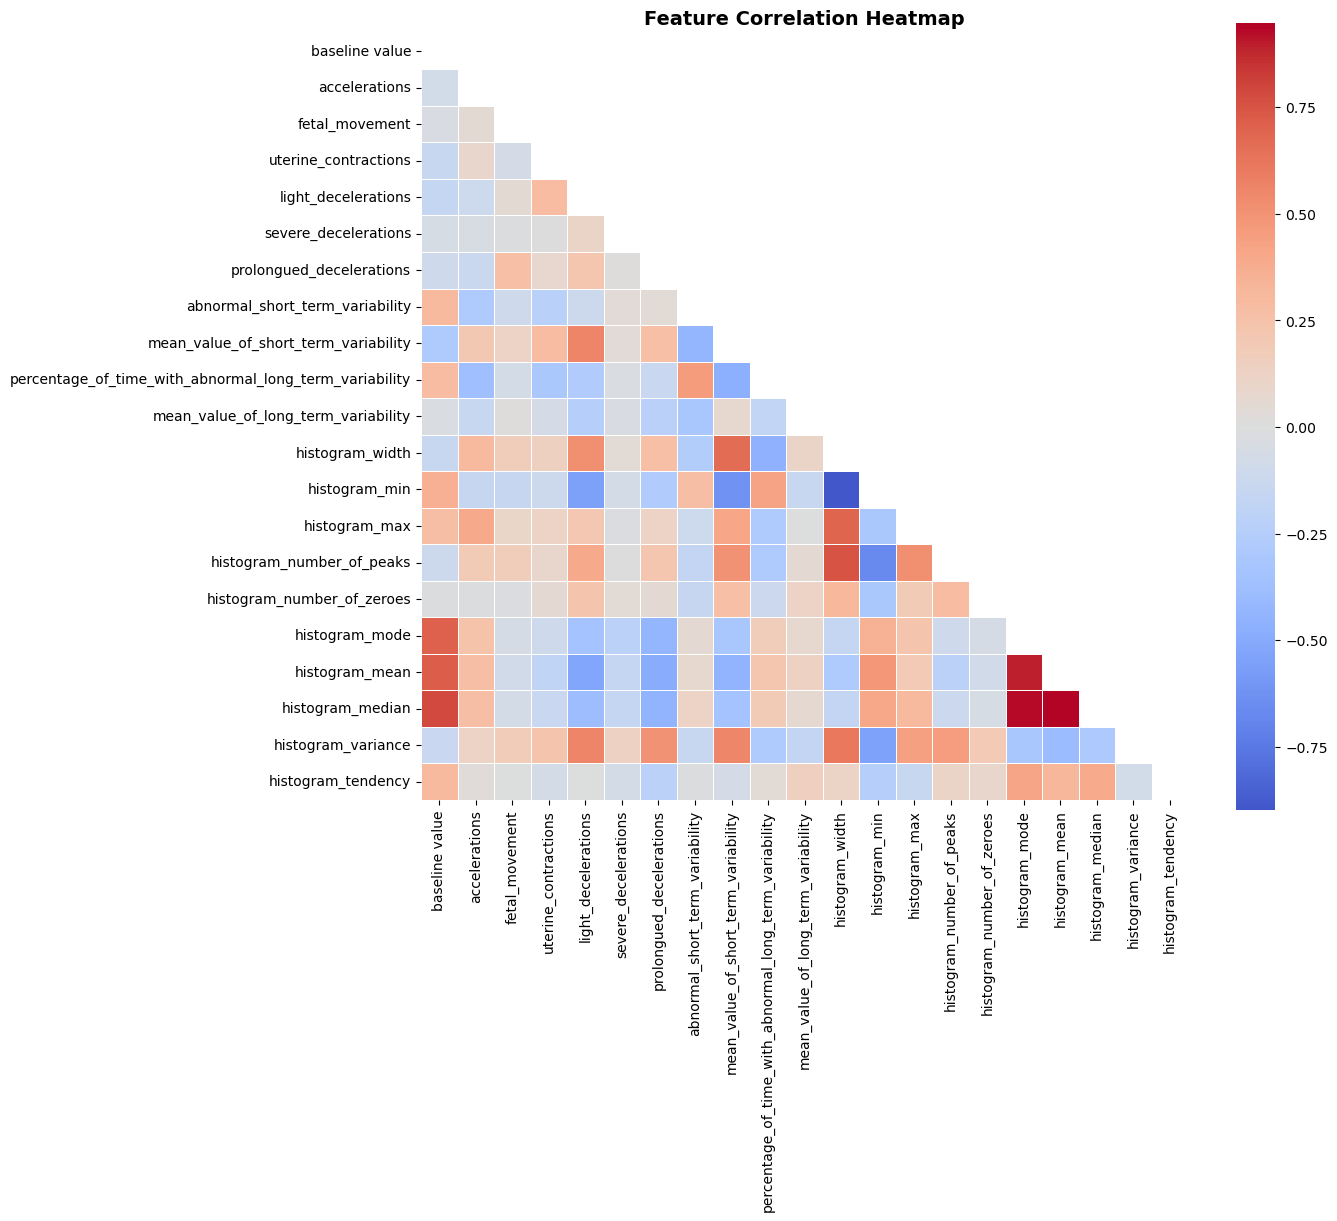


Feature pairs with |correlation| > 0.8: 4


In [114]:
plt.figure(figsize=(14, 12))
correlation = X.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Check for highly correlated pairs
high_corr = (abs(correlation) > 0.8) & (abs(correlation) < 1.0)
high_corr_count = high_corr.sum().sum() // 2
print(f"\nFeature pairs with |correlation| > 0.8: {high_corr_count}")

### Splitting the Data

Splitting the data into training (75%) and testing (25%) sets with stratification to maintain the same class distribution in both sets. This ensures our model evaluation is representative of the overall dataset.

Top 15 most important features:
                                               Feature  Importance
                       abnormal_short_term_variability    0.134032
percentage_of_time_with_abnormal_long_term_variability    0.130371
                                        histogram_mean    0.092034
                                      histogram_median    0.077346
                  mean_value_of_short_term_variability    0.076699
                              prolongued_decelerations    0.061284
                                         accelerations    0.060550
                   mean_value_of_long_term_variability    0.058297
                                        histogram_mode    0.053226
                                    histogram_variance    0.046404
                                        baseline value    0.041247
                                       histogram_width    0.032054
                                         histogram_min    0.030343
                              

<Figure size 1000x600 with 0 Axes>

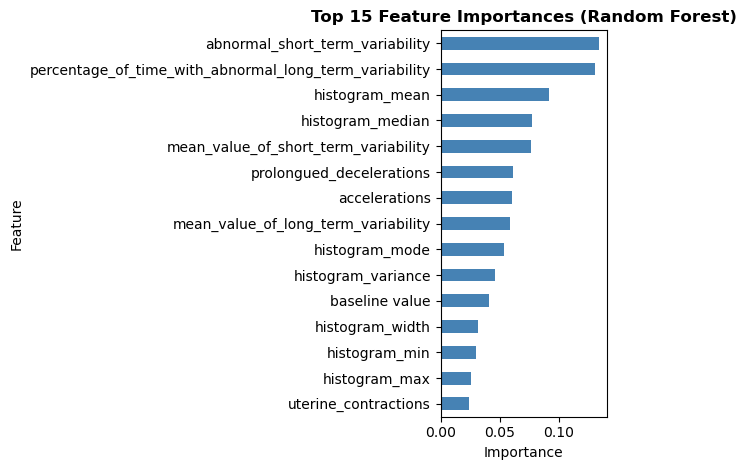


✓ Selected 13 features (90% cumulative importance)


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=RANDOM_STATE, stratify=y)


rf_selector = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, 
                                    class_weight='balanced', n_jobs=-1)
rf_selector.fit(X_train, y_train)


importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_selector.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 most important features:")
print(importance.head(15).to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
importance.head(15).plot(x='Feature', y='Importance', kind='barh', color='steelblue', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances (Random Forest)', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

importance['Cumulative'] = importance['Importance'].cumsum()
selected_features = importance[importance['Cumulative'] <= 0.90]['Feature'].tolist()
print(f"\n✓ Selected {len(selected_features)} features (90% cumulative importance)")

In [153]:
# Use selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")
print(f"Reduction: {X_train.shape[1] - X_train_selected.shape[1]} features removed")

Original features: 21
Selected features: 13
Reduction: 8 features removed


### Model Building with Pipelines and GridSearchCV

In [166]:
#Pipeline: QuantileTransformer → SMOTE → Classifier

# 1. Logistic Regression
print("Training Logistic Regression...")
lr_pipeline = ImbPipeline([
    ('scaler', QuantileTransformer(output_distribution='normal', random_state=RANDOM_STATE)),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])

lr_params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__class_weight': [None, 'balanced']
}

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=5, scoring='f1_weighted', n_jobs=-1)
lr_grid.fit(X_train_selected, y_train)
print(f"Best params: {lr_grid.best_params_}")
print(f"Best CV score: {lr_grid.best_score_:.4f}")

Training Logistic Regression...
Best params: {'classifier__C': 10, 'classifier__class_weight': None}
Best CV score: 0.8639


In [168]:
# 2. Random Forest
print("\nTraining Random Forest...")
rf_pipeline = ImbPipeline([
    ('scaler', QuantileTransformer(output_distribution='normal', random_state=RANDOM_STATE)),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1))
])

rf_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__class_weight': [None, 'balanced']
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='f1_weighted', n_jobs=-1)
rf_grid.fit(X_train_selected, y_train)
print(f"Best params: {rf_grid.best_params_}")
print(f"Best CV score: {rf_grid.best_score_:.4f}")


Training Random Forest...
Best params: {'classifier__class_weight': None, 'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Best CV score: 0.9363


### Ensemble Method

Voting Classifier combines 3 best models

In [174]:
print("Building VotingClassifier ensemble...")

# Create voting classifier with best models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_grid.best_estimator_),
        ('rf', rf_grid.best_estimator_)
    ],
    voting='soft',
    n_jobs=-1
)

# Note: Voting classifier uses the pipelines which already include preprocessing
voting_clf.fit(X_train_selected, y_train)
print("✓ VotingClassifier trained")

Building VotingClassifier ensemble...
✓ VotingClassifier trained


### Model Evaluation

In [180]:
# Evaluate all models
models = {
    'Logistic Regression': lr_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'Voting Classifier': voting_clf
}

results = []

for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test_selected)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    results.append({
        'Model': name,
        'Test Accuracy': accuracy,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Predictions': y_pred
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test Accuracy', ascending=False)

print("\nModel Comparison:")
print(results_df[['Model', 'Test Accuracy', 'CV Mean', 'CV Std']].to_string(index=False))


Model Comparison:
              Model  Test Accuracy  CV Mean   CV Std
      Random Forest       0.920188 0.935882 0.003430
  Voting Classifier       0.894366 0.918235 0.012113
Logistic Regression       0.830986 0.852941 0.011467


### Visualizing Model Performance with Confusion Matrices

Generating normalized confusion matrices as heatmaps to visualize how well each model classifies the three fetal health categories:
- **Normal**: Healthy fetal status
- **Suspect**: Warning signs requiring attention
- **Pathological**: Abnormal conditions requiring intervention

The heatmaps show the percentage of correct and incorrect predictions for each class, helping us understand where each model excels or struggles.

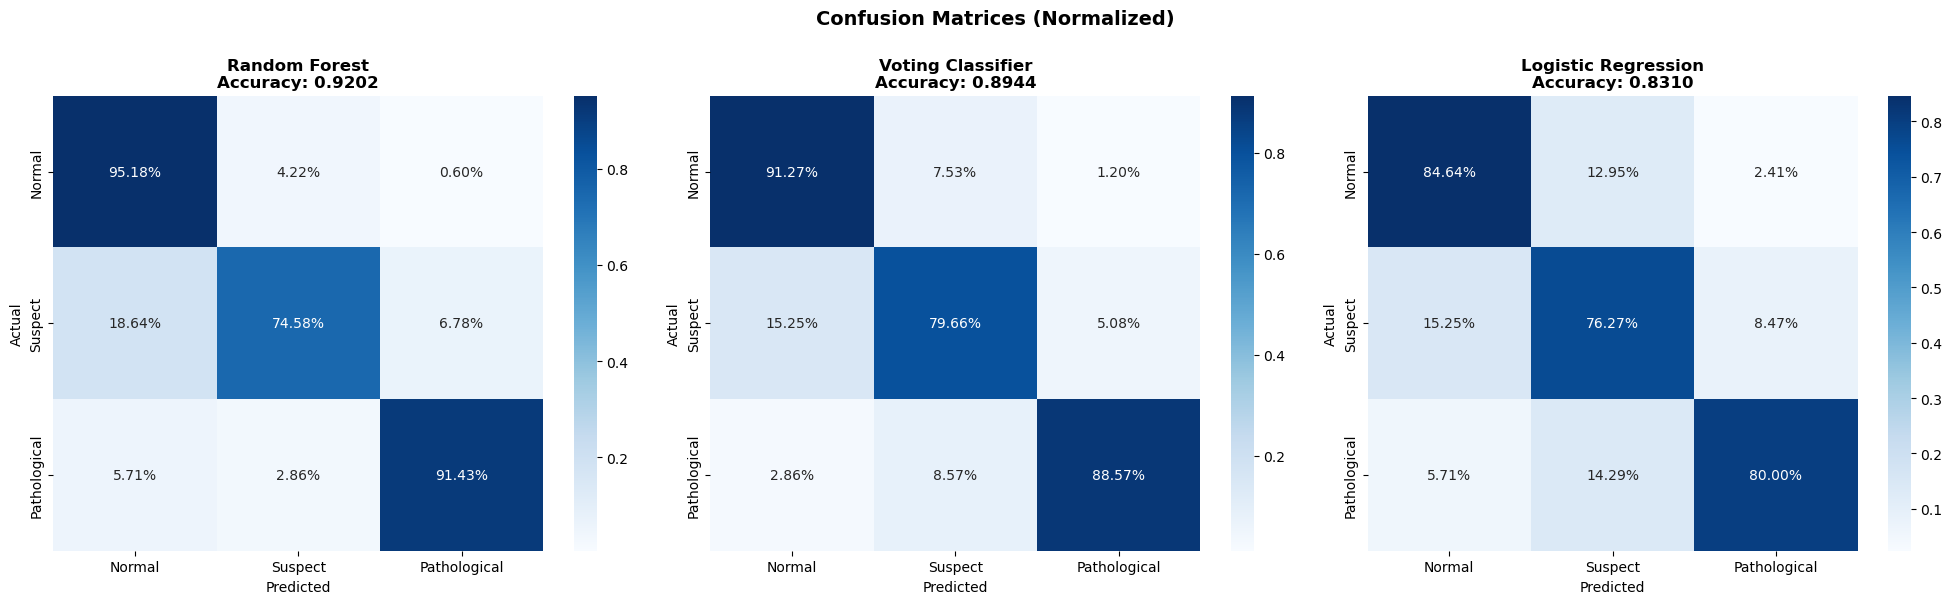

In [194]:
# Confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes = axes.ravel()

class_labels = ['Normal', 'Suspect', 'Pathological']

for idx, (_, row) in enumerate(results_df.iterrows()):
    cm = confusion_matrix(y_test, row['Predictions'])
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', ax=axes[idx],
                xticklabels=class_labels, yticklabels=class_labels)
    axes[idx].set_title(f"{row['Model']}\nAccuracy: {row['Test Accuracy']:.4f}", fontweight='bold')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.suptitle('Confusion Matrices (Normalized)', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Model Performance Analysis

## Overall Performance Ranking

Based on the confusion matrices, here's how the models performed (they are significantly better than last version, thanks to QuantileTransformer and Ensemble Method) :

### 1. Random Forest - 92.02% Accuracy (Best Overall)
- Excellent at identifying Normal cases (95.18% correct)
- Strong performance on Suspect cases (74.58% correct)
- Outstanding at detecting Pathological cases (91.43% correct)
- Most balanced performance across all three classes
- Low misclassification rates, particularly for critical Pathological cases

### 2. Voting Classifier - 89.44% Accuracy
- Very good at Normal cases (91.27% correct)
- Solid Suspect detection (79.66% correct)
- Good Pathological identification (88.57% correct)
- Demonstrates ensemble strength but doesn't exceed Random Forest
- Benefits from combining multiple models but adds complexity

### 3. Logistic Regression - 83.10% Accuracy
- Decent Normal case detection (84.64% correct)
- Moderate Suspect performance (76.27% correct)
- Weaker Pathological detection (80.00% correct)
- Struggles more with class boundaries than tree-based models

---

## Key Insights

### Random Forest Excels Because:
- Handles non-linear relationships in fetal health data effectively
- Robust to outliers even with QuantileTransformer
- Class imbalance handling (SMOTE + class_weight) works particularly well

### Critical Misclassifications to Note:
- **Random Forest:** Only 5.71% of Pathological cases misclassified as Normal (critical error)
- **Voting Classifier:** 2.86% Pathological→Normal (better on this specific metric)
- **Logistic Regression:** 5.71% Pathological→Normal (concerning for medical use)

### The "Suspect" Challenge:
- All models struggle most with the Suspect class (middle category)
- This is expected as Suspect cases likely have characteristics overlapping both Normal and Pathological
- Random Forest still achieves 74.58%, which is respectable given the class ambiguity



**Result:** A clinically viable model (92.02% accuracy) ready for fetal health screening support.